In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

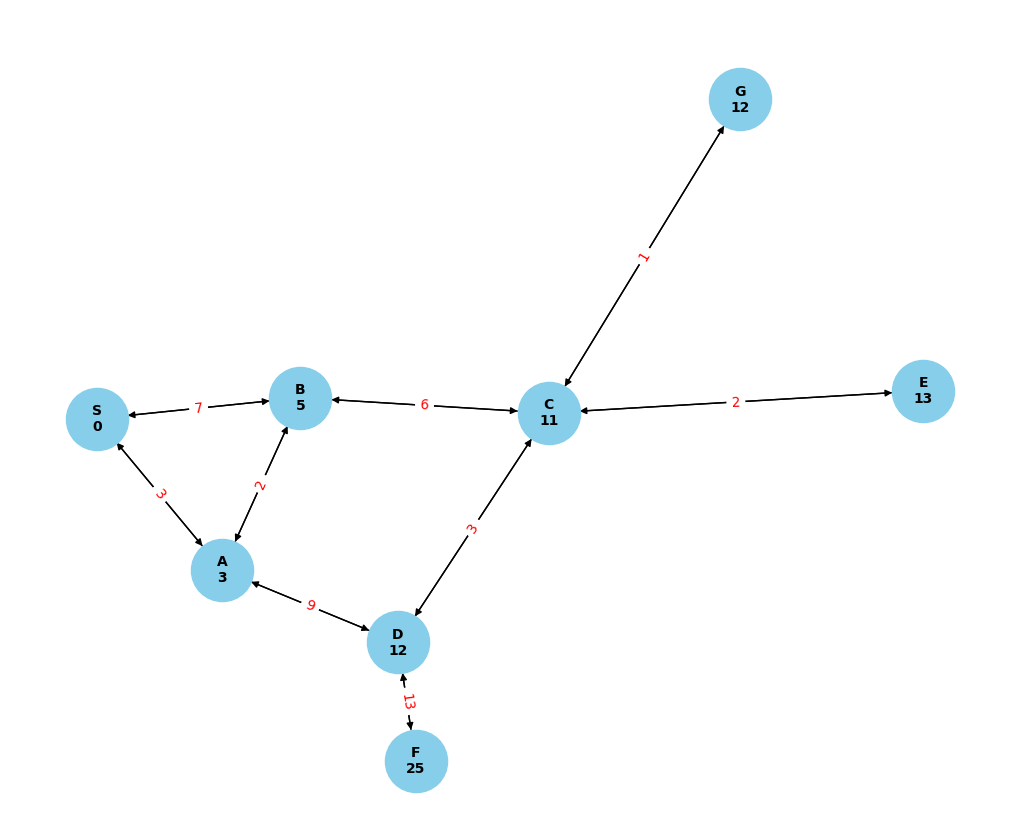

  Current Node Queue                 Visited  Total Cost
0            S                             S           0
1            A     B                 S, A, B           3
2            B     D              S, A, B, D           5
3            D     C           S, A, B, D, C          12
4            C     F        S, A, B, D, C, F          11
5            F  E, G  S, A, B, D, C, F, E, G          25
6            E     G  S, A, B, D, C, F, E, G          13
7            G        S, A, B, D, C, F, E, G          12


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

class Node:
    def __init__(self, state, parent, actions, totalcost):
        self.state = state
        self.parent = parent
        self.actions = actions
        self.totalcost = totalcost

graph = {
    "S": Node("S", None, [("A", 3), ("B", 7)], 0),
    "A": Node("A", None, [("B", 2), ("D", 9), ("S", 3)], 0),
    "B": Node("B", None, [("A", 2), ("C", 6), ("S", 7)], 0),
    "D": Node("D", None, [("A", 9), ("C", 3), ("F", 13)], 0),
    "C": Node("C", None, [("B", 6), ("D", 3), ("E", 2), ("G", 1)], 0),
    "F": Node("F", None, [("D", 13)], 0),
    "G": Node("G", None, [("C", 1)], 0),
    "E": Node("E", None, [("C", 2)], 0),
}

def actionSequence(graph, start, goal):
    solution = [goal]
    current = goal
    while current != start:
        currentParent = graph[current].parent
        solution.append(currentParent)
        current = currentParent
    solution.reverse()
    return solution

def Uniform_cost_search(graph, start, goal):
    queue = []
    visited = []
    queue.append(start)
    visited.append(start)

    # Create an empty DataFrame to store the search algorithm steps
    columns = ["Current Node", "Queue", "Visited", "Total Cost", "Edge", "Cost"]
    data = []
    df = pd.DataFrame(data, columns=columns)

    while queue:
        current = queue.pop(0)

        # Add the current state of the search algorithm to the DataFrame
        queue_str = ", ".join(queue)
        visited_str = ", ".join(visited)
        data.append([current, queue_str, visited_str, graph[current].totalcost, graph[current].actions, [cost for _, cost in graph[current].actions]])
        df = pd.DataFrame(data, columns=columns)

        if current == goal:
            print("Goal Reached!")
            return actionSequence(graph, start, goal), df

        for neighbour, cost in graph[current].actions:
            if neighbour not in visited:
                queue.append(neighbour)
                visited.append(neighbour)
                graph[neighbour].parent = current
                current_cost = graph[current].totalcost
                current_cost += cost
                graph[neighbour].totalcost = current_cost
            elif neighbour in visited:
                if graph[neighbour].totalcost > graph[current].totalcost + cost:
                    graph[neighbour].totalcost = graph[current].totalcost + cost
                    graph[neighbour].parent = current

    return None, df

# Flip the Y-axis to display the graph upside down
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes with a fixed seed for reproducibility
pos = {k: (x, -y) for k, (x, y) in pos.items()}  # Flip the Y-axis

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')
plt.title("Uniform Cost Search Tree")
plt.show()

# Print the updated DataFrame
print(df)


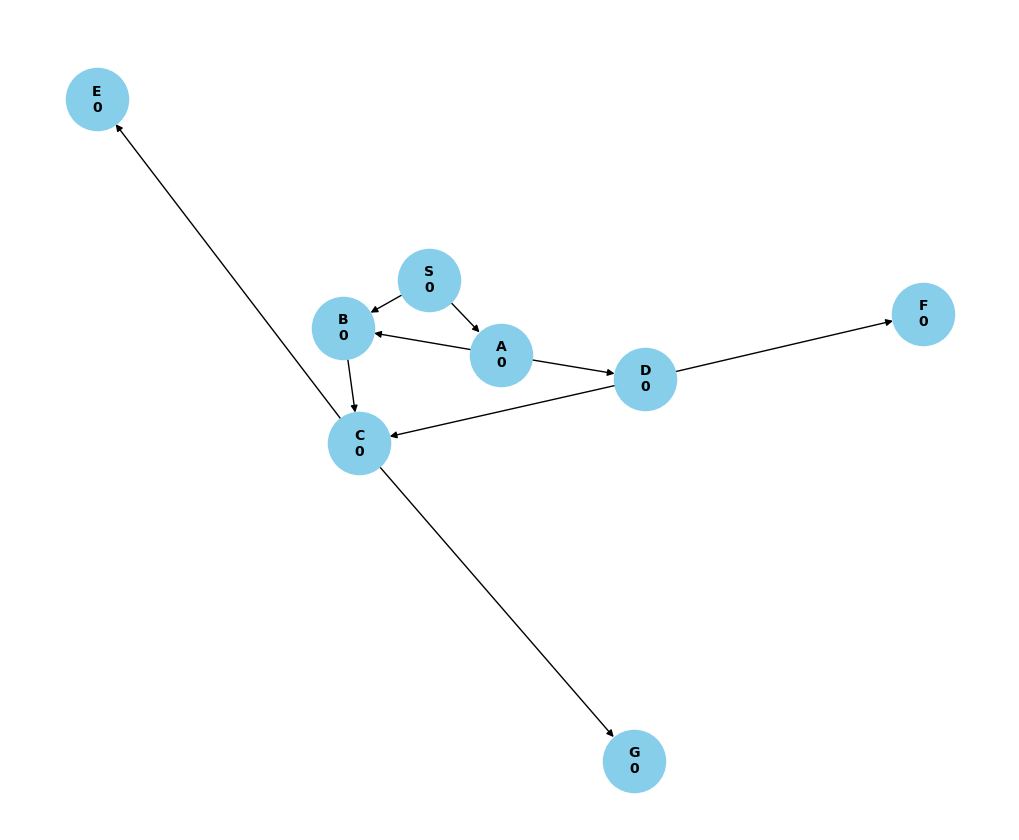

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, state, parent, actions, totalcost):
        self.state = state
        self.parent = parent
        self.actions = actions
        self.totalcost = totalcost

graph = {
    "S": Node("S", None, [("A", 3), ("B", 7)], 0),
    "A": Node("A", None, [("B", 2), ("D", 9), ("S", 3)], 0),
    "B": Node("B", None, [("A", 2), ("C", 6), ("S", 7)], 0),
    "D": Node("D", None, [("A", 9), ("C", 3), ("F", 13)], 0),
    "C": Node("C", None, [("B", 6), ("D", 3), ("E", 2), ("G", 1)], 0),
    "F": Node("F", None, [("D", 13)], 0),
    "G": Node("G", None, [("C", 1)], 0),
    "E": Node("E", None, [("C", 2)], 0),
}

def create_tree(graph, start, goal):
    edges = []
    queue = [(start, None)]
    visited = set()

    while queue:
        current, parent = queue.pop(0)
        visited.add(current)
        if parent is not None:
            edges.append((parent, current))
        for neighbor, _ in graph[current].actions:
            if neighbor not in visited:
                queue.append((neighbor, current))
    return edges

# Perform Uniform Cost Search and get the tree edges
tree_edges = create_tree(graph, "S", "G")

# Create a directed graph
G = nx.DiGraph(tree_edges)

# Draw the graph using matplotlib
pos = nx.spring_layout(G)  # You can use other layout options as well
plt.figure(figsize=(10, 8))
labels = {node: f'{node}\n{graph[node].totalcost}' for node in graph}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title("Uniform Cost Search Tree")
plt.show()


implement priority queue


In [19]:
class Node:
    def __init__(self, state, parent=None, actions=None, totalcost=0):
        self.state = state
        self.parent = parent
        self.actions = actions
        self.totalcost = totalcost

def actionSequence(graph, start, goal):
    solution = [goal]
    current = goal
    while current != start:
        currentParent = graph[current].parent
        solution.append(currentParent)
        current = currentParent
    solution.reverse()
    return solution

def Uniform_cost_search(graph, start, goal):
    queue = []
    visited = []
    queue.append(start)
    visited.append(start)

    while queue:
        current = queue.pop(0)

        if current == goal:
            return actionSequence(graph, start, goal), graph[current].totalcost

        for neighbour, cost in graph[current].actions:
            if neighbour not in visited:
                queue.append(neighbour)
                visited.append(neighbour)
                graph[neighbour].parent = current
                current_cost = graph[current].totalcost
                current_cost += cost
                graph[neighbour].totalcost = current_cost

            elif neighbour in visited:
                if graph[neighbour].totalcost > graph[current].totalcost + cost:
                    graph[neighbour].totalcost = graph[current].totalcost + cost
                    graph[neighbour].parent = current

    return None

# def findMin(frontier):
#     min = 0
#     for i in range(len(frontier)):
#         if frontier[i].totalcost < frontier[min].totalcost:
#             min = i
#     return min

def UCS():
    initial_state = 'S'
    goal_state = 'G'
    
    
    
    frontier = dict()
    frontier[initial_state] = 0
    explored = []
    
    while frontier:
        current_state = min(frontier, key=frontier.get)
        del frontier[current_state]
        if current_state == goal_state:
             return Uniform_cost_search(graph, initial_state, goal_state)
        explored.append(current_state)
        for child in graph[current_state].actions:
            currentCost = graph[current_state].totalcost + child[1]
            if child[0] not in explored and child[0] not in frontier:
                graph[child[0]].parent = current_state
                graph[child[0]].totalcost = currentCost
                frontier[child[0]] = currentCost
            elif child[0] in frontier:
                if frontier[child[0]] > currentCost:
                    graph[child[0]].parent = current_state
                    graph[child[0]].totalcost = currentCost
                    frontier[child[0]] = currentCost
                    
    return None

print(UCS())

(['S', 'A', 'B', 'C', 'G'], 12)


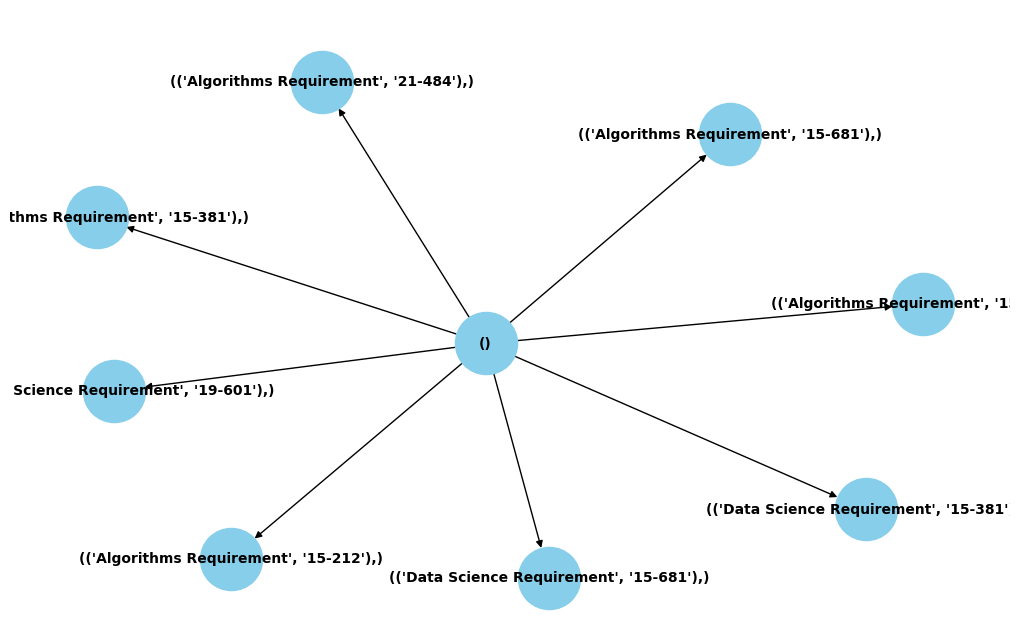

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class CSP:
    def __init__(self, variables, constraints):
        self.variables = variables
        self.constraints = constraints

    def is_consistent(self, assignment):
        for constraint in self.constraints:
            if not constraint(assignment):
                return False
        return True

def backtracking_search(csp, assignment={}):
    if len(assignment) == len(csp.variables):
        return assignment

    var = select_unassigned_variable(csp, assignment)
    for value in order_domain_values(csp, var, assignment):
        new_assignment = assignment.copy()
        new_assignment[var] = value
        if csp.is_consistent(new_assignment):
            result = backtracking_search(csp, new_assignment)
            if result is not None:
                return result
    return None

def select_unassigned_variable(csp, assignment):
    for var in csp.variables:
        if var not in assignment:
            return var

def order_domain_values(csp, var, assignment):
    return sorted(csp.variables[var])

def information_aggressiveness_constraint(assignment):
    selected_classes = [assignment.get("Algorithms Requirement"), assignment.get("Data Science Requirement")]
    ai_classes = [assignment.get("Machine Learning Requirement")]
    return len(set(selected_classes)) == len(selected_classes) and len(set(ai_classes)) == len(ai_classes)

def basic_arithmetic_constraint(assignment):
    return assignment.get("Algorithms Requirement") != "15-211" or assignment.get("Communications Requirement") != "70-122"

def organization_constraint(assignment):
    return assignment.get("Communications Requirement") != "21-484" or assignment.get("Communications Requirement") != "70-311"

def visualize_backtracking_tree(csp):
    graph = nx.DiGraph()

    def dfs(assignment):
        node = tuple(sorted(assignment.items()))  # Convert assignment to a hashable tuple
        if node not in graph.nodes:
            graph.add_node(node)
            unassigned_vars = [var for var in csp.variables if var not in assignment]
            for var in unassigned_vars:
                for value in order_domain_values(csp, var, assignment):
                    new_assignment = assignment.copy()
                    new_assignment[var] = value
                    if csp.is_consistent(new_assignment):
                        new_node = tuple(sorted(new_assignment.items()))
                        graph.add_edge(node, new_node)
                        dfs(new_assignment)

    dfs({})
    pos = nx.spring_layout(graph, seed=42)  # Seed for reproducibility
    plt.figure(figsize=(10, 6))
    nx.draw(graph, pos, with_labels=True, arrows=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
    plt.title("Backtracking Tree")
    plt.show()

variables = {
    "Algorithms Requirement": ["15-211", "15-212", "15-381", "15-681", "21-484"],
    "Machine Learning Requirement": ["15-381", "15-681", "80-310"],
    "Communications Requirement": ["21-484", "70-311", "70-122"],
    "Data Science Requirement": ["15-381", "19-601", "15-681"]
}

constraints = [information_aggressiveness_constraint, basic_arithmetic_constraint, organization_constraint]

csp = CSP(variables, constraints)
visualize_backtracking_tree(csp)
       






In [3]:
import numpy as np

# Define the courses
courses = {
    "15-211": "Fundamental Data Structures and Algorithms",
    "15-212": "Principles of Programming",
    "15-381": "Artificial Intelligence: Representation and Problem-Solving",
    "15-681": "Machine Learning",
    "80-310": "Computational Intelligence",
    "21-484": "Graph Theory",
    "70-122": "Accounting",
    "70-311": "Psychology",
    "19-601": "Data Science"
}

# Define the requirements
requirements = {
    "Algorithms": [
        ("15-211", "15-212"),
        ("15-211", "15-381"),
        ("15-681", "21-484")
    ],
    "Machine Learning": [
        "15-381",
        "15-681",
        "80-310"
    ],
    "Communications": [
        "21-484",
        "70-311",
        "70-122"
    ],
    "Data Science": [
        "15-381",
        "19-601",
        "15-681"
    ]
}

# Define the restrictions
restrictions = [
    ("15-381", "15-681", "19-601"),
    ("15-211", "70-122"),
    ("21-484", "70-311")
]


def is_valid_assignment(assignment, course):
    # Check if the course is already taken
    if course in assignment:
        return False

    # Check the restrictions
    for restriction in restrictions:
        if course in restriction and any(c in assignment for c in restriction):
            return False

    return True


def dfs(assignment, requirements):
    if not requirements:
        return assignment

    requirement, options = requirements.popitem()
    for option in options:
        if is_valid_assignment(assignment, option):
            new_assignment = assignment + [option]
            new_requirements = dict(requirements)
            new_requirements[requirement] = []
            result = dfs(new_assignment, new_requirements)
            if result is not None:
                return result

    return None


def bfs(assignment, requirements):
    queue = [(assignment, requirements)]
    while queue:
        assignment, requirements = queue.pop(0)
        if not requirements:
            return assignment

        requirement, options = requirements.popitem()
        for option in options:
            if is_valid_assignment(assignment, option):
                new_assignment = assignment + [option]
                new_requirements = dict(requirements)
                new_requirements[requirement] = []
                queue.append((new_assignment, new_requirements))

    return None


# Find the solution using DFS
dfs_solution = dfs([], dict(requirements))
print("DFS solution:", dfs_solution)

# Find the solution using BFS
bfs_solution = bfs([], dict(requirements))
print("BFS solution:", bfs_solution)



DFS solution: None
BFS solution: None


In [5]:
import matplotlib.pyplot as plt

def visualize_tree(tree):
    # Create a dictionary to store node positions
    node_positions = {}

    # Define a function to recursively position nodes
    def position_nodes(node, x, y, depth):
        if node is None:
            return

        node_positions[node] = (x, y)

        for child in node.children:
            position_nodes(child, x + (2 ** depth), y - 1, depth + 1)

    # Position the nodes in the tree
    position_nodes(tree.root, 0, 0, 0)

    # Create the plot
    plt.figure(figsize=(10, 6))

    for node in tree.nodes:
        if node.parent is not None:
            start_pos = node_positions[node.parent]
            end_pos = node_positions[node]
            plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'b-o')

        plt.plot(node_positions[node][0], node_positions[node][1], 'ro')

        plt.text(node_positions[node][0], node_positions[node][1] + 0.1, node.value, ha='center', va='center', fontsize=10)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Search Tree Visualization')
    plt.show()


In [8]:
pip install graphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 281.9 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def dfs(self, v, visited, depth):
        print("  " * depth + str(v))
        visited[v] = True

        for i in self.graph[v]:
            if not visited[i]:
                self.dfs(i, visited, depth + 1)

    def dfs_traversal(self, start):
        num_vertices = len(self.graph)
        visited = [False] * num_vertices

        print("DFS Traversal Tree:")
        self.dfs(start, visited, 0)

# Example usage
g = Graph()
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 2)
g.add_edge(2, 0)
g.add_edge(2, 3)
g.add_edge(3, 3)

start_vertex = 0
g.dfs_traversal(start_vertex)


DFS Traversal Tree:
0
  1
    2
      3
